In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
survey = pd.read_excel("Sample Survey.xlsx",sheet_name="Data")

In [13]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [14]:
data = pd.read_excel("Sample Survey.xlsx",sheet_name= "Description")

In [15]:
data.head()

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.


In [16]:
data

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.
5,Vote_Now,"If elections are held today, which party will ..."
6,Past_Vote,Which party did the respondent vote for in the...
7,CM_satisfaction,How satisfied is the respondent with the perfo...
8,MLA_satisfaction,How satisfied is the respondent with the perfo...
9,age,The age of the respondent.


In [17]:
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [18]:
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                         object
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [19]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [20]:
graph = survey.groupby('collection_date')['response_id'].size()

Text(0.5, 1.0, 'Number of Samples Collected on Each Day')

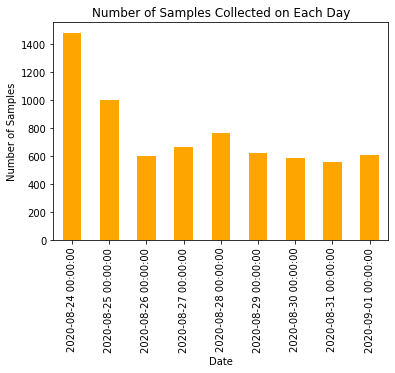

In [21]:
graph.plot(kind ="bar",color="orange")
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.title('Number of Samples Collected on Each Day')

In [22]:
survey[survey['age'] == '24ko'] = 24

In [23]:
survey['age'] = pd.to_numeric(survey['age'], errors='coerce').astype('Int64')

In [24]:
less45 = (len(survey[survey['age']<45])/len(survey['age']))*100
print(less45)

93.18479685452162


In [25]:
def group(x):
    if x > 55:
        return "55+"
    elif x <= 55 and x > 40:
        return "40-55"
    elif x <= 40 and x>25:
        return "25-40"
    elif x<=25 and x >= 18 :
        return "18-25"
    else :
        return "Not valid"


In [26]:
survey['age'] = survey['age'].fillna(0)

In [27]:
survey['age_group'] = survey['age'].apply(group)

In [28]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24 00:00:00,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24 00:00:00,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24 00:00:00,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,18-25
3,4,2020-08-24 00:00:00,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24 00:00:00,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


<AxesSubplot:xlabel='age_group'>

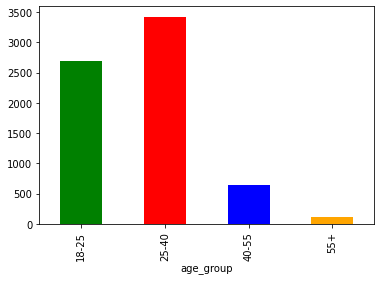

In [29]:
colors = ['green', 'red', 'blue', 'orange','yellow']
survey.groupby("age_group")['response_id'].count().plot(kind='bar',color=colors)


In [30]:
Rjd_voting = survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]
propeortion = len(Rjd_voting)/len(survey)
print(propeortion*100)

11.810106305519149


In [31]:
statisfied = survey[survey['CM_satisfaction'] == 'Fully Satisfied']
print(statisfied)

      response_id      collection_date urban_rural               education  \
4               5  2020-08-24 00:00:00       Rural                Graduate   
8               9  2020-08-24 00:00:00       Urban               12th Pass   
14             15  2020-08-24 00:00:00       Rural                Graduate   
17             18  2020-08-24 00:00:00       Urban                Graduate   
28             29  2020-08-24 00:00:00       Rural                Graduate   
...           ...                  ...         ...                     ...   
6851         6852  2020-09-01 00:00:00       Urban                Graduate   
6852         6853  2020-09-01 00:00:00       Rural                Graduate   
6862         6863  2020-09-01 00:00:00       Rural               10th Pass   
6865         6866  2020-09-01 00:00:00       Rural  Professional Education   
6866         6867  2020-09-01 00:00:00       Rural               10th Pass   

                   income   Vote_Now     Past_Vote  CM_satisfac

In [32]:
fully = statisfied.groupby('collection_date').size()
print(fully)

collection_date
2020-08-24    145
2020-08-25     95
2020-08-26     59
2020-08-27     54
2020-08-28     92
2020-08-29     73
2020-08-30     65
2020-08-31     62
2020-09-01     75
dtype: int64


Text(0.5, 0, 'Date')

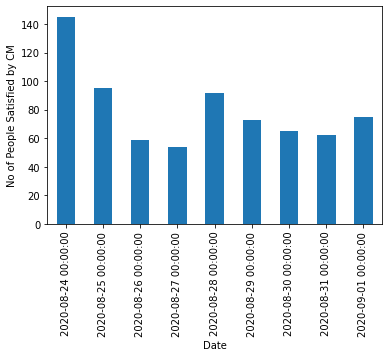

In [33]:
fully.plot(kind='bar')
plt.ylabel('No of People Satisfied by CM')
plt.xlabel("Date")

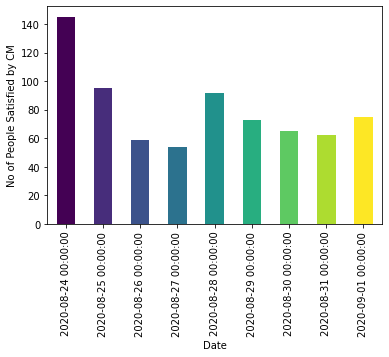

In [34]:
colors = plt.cm.viridis(np.linspace(0, 1, len(fully)))

fully.plot(kind='bar', color=colors)

plt.ylabel('No of People Satisfied by CM')
plt.xlabel("Date")
plt.show()

In [44]:
staisfaction = survey['CM_satisfaction'].value_counts()

<AxesSubplot:>

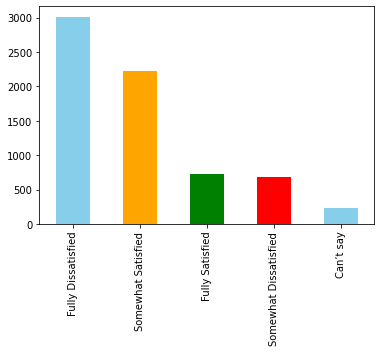

In [46]:
staisfaction.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])

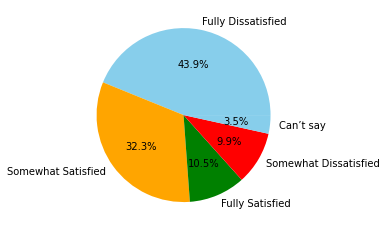

In [48]:
plt.pie(staisfaction, labels=staisfaction.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.show()

  age_group  Samples age groups
0     18-25                2692
1     25-40                3423
2     40-55                 644
3       55+                 108


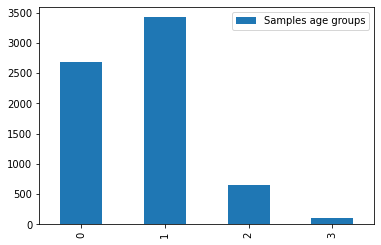

In [58]:
age_grp = survey.groupby('age_group').size().reset_index(name="Samples age groups")
print(age_grp)
age_grp.plot(kind='bar')
plt.show()

  age_group  total_samples
0     18-25            215
1     25-40            245
2     40-55             55
3       55+             10


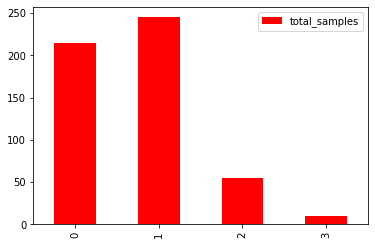

In [59]:
jdu_party = survey[survey['Vote_Now'] == 'JD(U)'].groupby('age_group').size().reset_index(name='total_samples')
print(jdu_party)
jdu_party.plot(kind='bar',color="red")
plt.show()

In [60]:
merge_df = pd.merge(age_grp,jdu_party,on="age_group")

In [61]:
merge_df

,age_group,Samples age groups,total_samples
0,18-25,2692,215
1,25-40,3423,245
2,40-55,644,55
3,55+,108,10


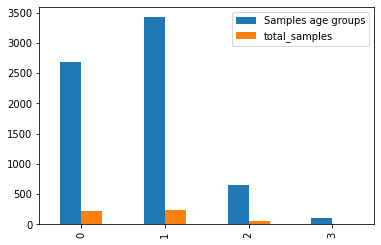

In [63]:
merge_df.plot(kind="bar")
plt.show()